### Default Risk of Credit Card Project

<b>Project Description</b> 

This project expropriates data from clients' information to predict if a client is about to defualt or not. 

Source of project: https://medium.com/mlearning-ai/credit-risk-modelling-in-python-7b21a0b794b1

Source of the dataset: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
default_risk = pd.read_csv('UCI_Credit_Card.csv')

# Display the first few rows of the dataframe to verify that it loaded correctly
default_risk.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


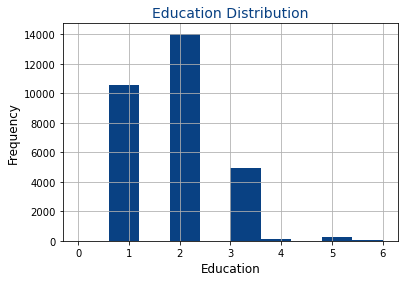

In [3]:
dark_blue_hex = "#094183"
text_blue_hex = "#094183"

default_risk["EDUCATION"].hist(color = dark_blue_hex)

# Set the x-axis label font size to 12
plt.xlabel('Education', fontsize=12)

# Set the y-axis label font size to 12
plt.ylabel('Frequency', fontsize=12)

# Set the title of the plot to 'Age Distribution'
plt.title('Education Distribution', fontsize=14, color=text_blue_hex)

plt.show()

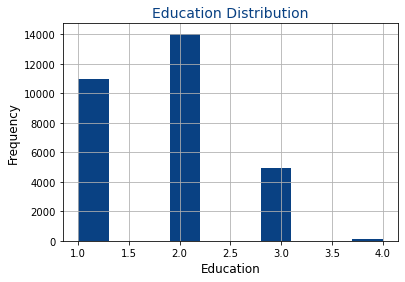

In [4]:
# Replacing 5 & 6 with 1
default_risk["EDUCATION"].replace({0:1,1:1,2:2,3:3,4:4,5:1,6:1}, inplace=True)

default_risk["EDUCATION"].value_counts()

default_risk["EDUCATION"].hist(color = dark_blue_hex)

# Set the x-axis label font size to 12
plt.xlabel('Education', fontsize=12)

# Set the y-axis label font size to 12
plt.ylabel('Frequency', fontsize=12)

# Set the title of the plot to 'Age Distribution'
plt.title('Education Distribution', fontsize=14, color=text_blue_hex)

plt.show()

In [5]:
default_risk['MARRIAGE'].value_counts()
default_risk['MARRIAGE'].replace({0:1,1:1,2:2,3:3}, inplace=True)
default_risk['MARRIAGE'].value_counts()

2    15964
1    13713
3      323
Name: MARRIAGE, dtype: int64

### Using 3NN Model-based Imputation to fill missing values

In [6]:
from sklearn.impute import KNNImputer

# Create a KNN imputer object
imputer = KNNImputer(n_neighbors=3)

# Fit the imputer to the DataFrame and transform the data
imputed_df = imputer.fit_transform(default_risk)

# Convert the imputed data back to a DataFrame
imputed_df = pd.DataFrame(imputed_df, columns=default_risk.columns)

# Replace the original data with the imputed one
default_risk = imputed_df
default_risk.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


### Split data into features and label

In [7]:
# Separate the labels (y) from the features (X)
label = 'default.payment.next.month'

X = default_risk.drop(label, axis=1)
y = default_risk[label]

columns = X.columns
columns

X.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


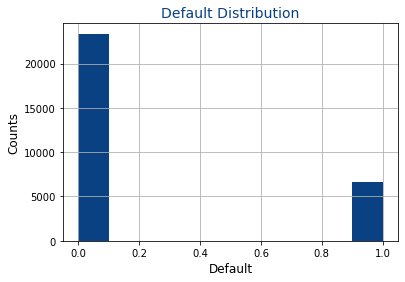

In [8]:
# Visualise the label distribution
y.hist(color = dark_blue_hex)

# Set the x-axis label font size to 12
plt.xlabel('Default', fontsize=12)

# Set the y-axis label font size to 12
plt.ylabel('Counts', fontsize=12)

# Set the title of the plot to 'Age Distribution'
plt.title('Default Distribution', fontsize=14, color=text_blue_hex)

plt.show()

### Standardise the scale of values

In [9]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= scaler.fit_transform(X)

### Discover the 10 best features to use for training

In [10]:
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import seaborn as sns

# Perform mutualinformation selection feature selection
selector = SelectKBest(mutual_info_classif, k=10)
X_new = selector.fit_transform(X, y)

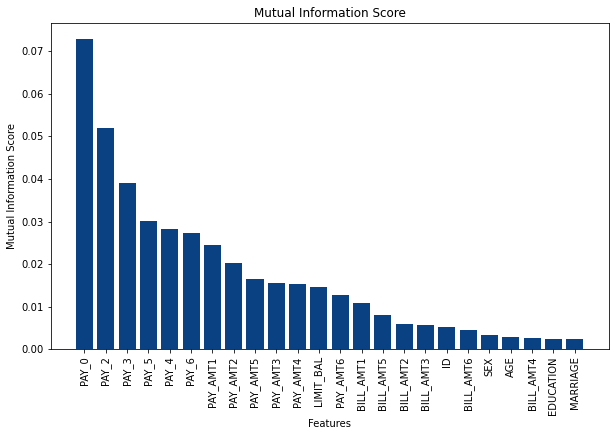

In [11]:
# Get the mutual information scores for each feature
scores = selector.scores_

# Create a dataframe to store the scores
score_df = pd.DataFrame({'Feature': columns, 'Mutual Information Score': scores})

# Sort the dataframe by the scores in descending order
score_df = score_df.sort_values(by='Mutual Information Score', ascending=False)

# Visualize the mutual information scores for each feature
plt.figure(figsize=(10,6))
plt.bar(score_df['Feature'], score_df['Mutual Information Score'], color = dark_blue_hex)
plt.xticks(rotation=90)
plt.ylabel('Mutual Information Score')
plt.xlabel('Features')
plt.title("Mutual Information Score")
plt.show()

### Split data into training and testing

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_new, y, test_size=0.30,random_state=42)

### Using Synthetic Minority Oversampling Technique (SMOTE) to balance the labels

In [15]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE= SMOTE()

# fit and apply the transform 
X_train,y_train= SMOTE.fit_resample(X_train,y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({0.0: 16324, 1.0: 4676})
After oversampling:  Counter({1.0: 16324, 0.0: 16324})


### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
logit= LogisticRegression()
logit.fit(X_train, y_train)
# Predicting the model
pred_logit= logit.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, accuracy_score

print("The accuracy of logit model is:", accuracy_score(y_test, pred_logit))
print(classification_report(y_test, pred_logit))

The accuracy of logit model is: 0.7068888888888889
              precision    recall  f1-score   support

         0.0       0.87      0.73      0.80      7040
         1.0       0.39      0.62      0.48      1960

    accuracy                           0.71      9000
   macro avg       0.63      0.68      0.64      9000
weighted avg       0.77      0.71      0.73      9000



### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
# Fitting the model
rf.fit(X_train,y_train)
# Predicting the model
pred_rf= rf.predict(X_test)

In [33]:
print("The accuracy of random forest is:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

The accuracy of random forest is: 0.7612222222222222
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84      7040
         1.0       0.46      0.51      0.48      1960

    accuracy                           0.76      9000
   macro avg       0.66      0.67      0.66      9000
weighted avg       0.77      0.76      0.77      9000



### 10-cross-validation

In [34]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf,X,y,cv=10)
score.mean()

0.8154999999999999